<a href="https://colab.research.google.com/github/abhinsuresh/MLTSA_ASuresh/blob/master/HW4/chchchchanges_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

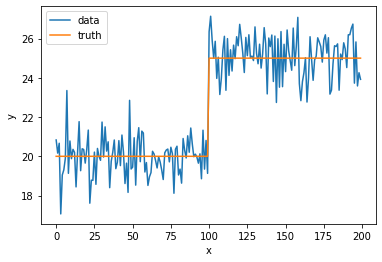

In [2]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [3]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 19.96, mean after: 25.12


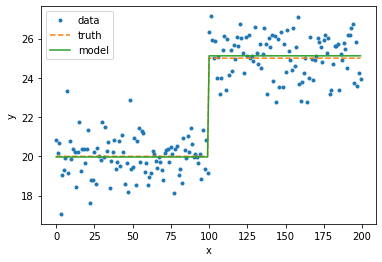

In [4]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 2. The blue dots represents the data. The 'truth' is represented by orange dashed line. The green line is predicted truth from data using the function maxdiff()

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [5]:
def poc_mse(y):
    """Calculate the POC as the point that minimize the square error before and after the POC.

    y : vector of endogenous variables
    returns:
    poc : point of change
    before : mean value before point of change
    after : mean value after point of change
    """
    N = len(y)
    f = np.nanmean
    #sq_err_here = np.zeros(N-1)
    poc, sq_err, before, after = 0, np.nan, np.nan, np.nan
    for i in range(1, N):
        sq_err_here = ((y[:i] - f(y[:i]))**2).sum() + \
                      ((y[i:] - f(y[i:]))**2).sum()
        if i == 1:
            sq_err = sq_err_here

        if sq_err_here <= sq_err:
            sq_err = sq_err_here
            poc = i
            before, after = f(y[:i]), f(y[i:])

    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 19.96, mean after: 25.12


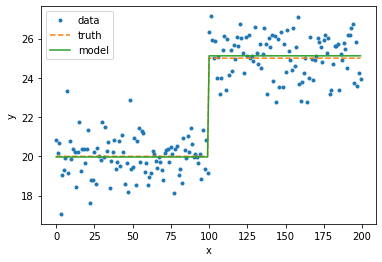

In [6]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 3. The blue dots represents the data. The 'truth' is represented by orange dashed line. The green line for POC and mean values obtained from data using the function poc_mse()

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [15]:
import warnings
warnings.filterwarnings("ignore")
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
       the mean or variance before and the mean after the POC.
    Args:
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    Returns:
    poc : point of change
    before : standard deviation/mean before POC
    after : standard deviation/mean after POC
    """
    if not sigma:
        N = len(y)
        f = np.nanmean          # defining f as mean
        poc, diff, before, after = 0, 0, np.nan, np.nan
        for i in range(1, N):
            diff_here = np.abs(f(y[i:]) -  f(y[:i]))
            if diff < diff_here:
                diff = diff_here
                poc = i
                before, after = f(y[:i]), f(y[i:])
        return(poc, before, after)  

    else:
        N = len(y)
        f = np.std             # defining f as standard deviation
        poc, diff, before, after = 0, 0, np.nan, np.nan
        for i in range(1, N):
            diff_here = np.abs(f(y[:i]) - f(y[i:]))
            if diff < diff_here:
                diff = diff_here
                poc = i
                before, after  = f(y[:i]), f(y[i:])
        return(poc, before, after)   

print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, sigma = True)))

poc: 101.00, standard deviation before: 0.90, standard deviation after: 3.88


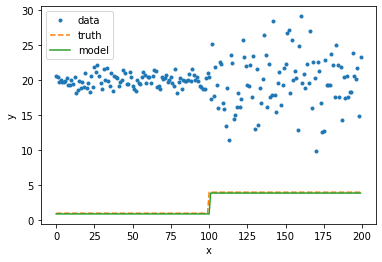

In [13]:
poc, before, after = maxdiff(ys, sigma = True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [1] * 100 + [4] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 4. The blue dots represents the data. The 'truth' is represented by orange dashed line showing the standard deviation. The green line represents the predicted standard deviation from the data showing the POC as well

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

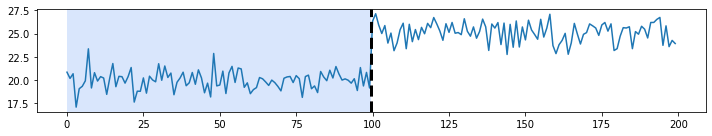

In [19]:
# detection
algo = rpt.Pelt(model="rbf").fit(ym)
result = algo.predict(pen=10)

# display
rpt.display(ym, [100], result)
pl.show()

Fig. 5. In this figure we show the POC obtained using rupture package using 'rbf' model for the first sythetic data set when we had change in mean value

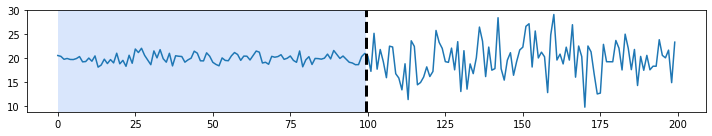

In [20]:
# detection
algo = rpt.Pelt(model="rbf").fit(ys)
result = algo.predict(pen=10)

# display
rpt.display(ys, [100], result)
pl.show()

Fig. 6. In this figure we show the POC obtained using rupture package using 'rbf' model for the second sythetic data set when we had change in variance

# Read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [62]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv")
eq1.rename(columns={'Unnamed: 0':'ds'}, inplace=True)
eq1.set_index('ds', inplace=True)
eq1.head()

,acoustic_data,time_to_failure
ds,,
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [63]:
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


Table 1. This tabel summarises the data set obtained for the earthquake measures conducted in a laboratory

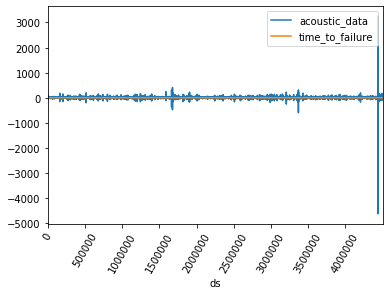

In [69]:
eq1.plot(rot='60')

Fig. 7. This figure visually represent the entire data set which have the value for acoustic data and time to failure: time taken before next laboratory earthquake to occur using sesmic data

# Using Rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




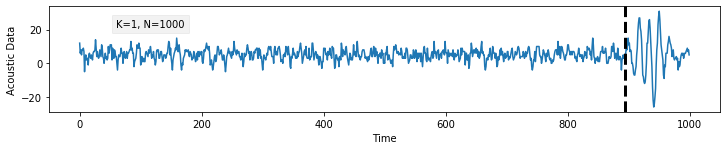

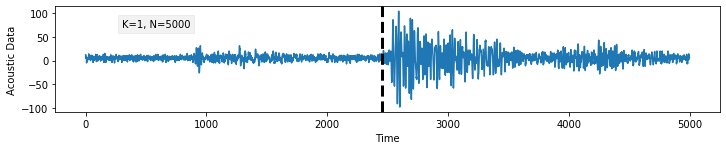

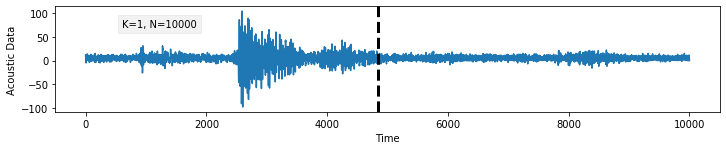

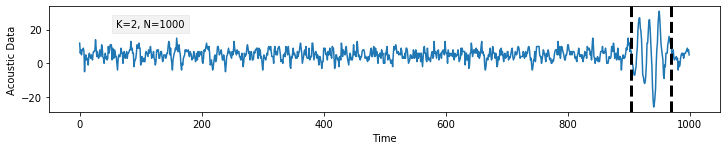

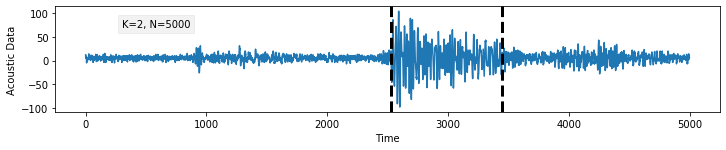

KeyboardInterrupt: ignored

In [77]:
N = [1000, 5000, 10000]
k = [1, 2, 3]
for k_index in k :

    for N_index in N :
        data = array(eq1.acoustic_data[:N_index])
        algo1 = rpt.Dynp(model="rbf").fit(data)
        result = algo1.predict(n_bkps=k_index)

        # display
        fig, ax = rpt.display(eq1.acoustic_data.values[:N_index], [], result);
        ax[0].text(0.1, 0.8, 'K=%s, N=%s' %(k_index, N_index), transform=ax[0].transAxes, 
                 color='k', bbox=dict(facecolor='k', alpha=0.05))
        ax[0].set_ylabel('Acoustic Data')
        ax[0].set_xlabel('Time')
        plt.show()

Fig. 8. In this figure we used rupture package to predict the POC for different range of data set (1000, 5000, 10000) with 3 cases in which we choose to have 1, 2, 3 point of changes

**==> I do understand that running all combinations takes time, expecially for O(kN^2) complexity alg, so I give you full score**

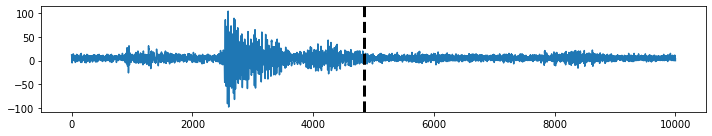

In [0]:
algo1 = rpt....
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()


caption

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

In [0]:
dat = array(eq1.acoustic_data[:10000])
algo_1 =  rpt.Binseg(model="rbf").fit(dat)
algo_2 = rpt.Dynp(model="rbf").fit(dat)


result_1 = algo_1.predict(n_bkps=4)
result_2 = algo_2.predict(n_bkps=4)


        # display
fig, axs = rpt.display(eq1.acoustic_data.values[:10000],[] , result);
axs[0].text(0.1, 0.8, 'K=%s, N=%s' %(10000, 4), transform=axs[0].transAxes, 
            fontsize=16, bbox=dict(facecolor='gray', alpha=0.1))
plt.show( )

Fig. 9. This figure is POC predicted using rutpture package with 4 POC and 10000 datapoints

**==> But at least you have to give me a plot with chunks you got.**